In [1]:
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
# after you extract the dataset, 
# put cell_images folder in the working directory
img_dir="cell_images"  
img_size=70

def load_img_data(path):
    image_files = glob.glob(os.path.join(path, "Parasitized/*.png")) + \
                  glob.glob(os.path.join(path, "Uninfected/*.png"))
    X, y = [], []
    for image_file in image_files:
        # 0 for uninfected and 1 for infected
        label = 0 if "Uninfected" in image_file else 1
        # load the image in gray scale
        img_arr = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)
        # resize the image to (70x70)
        img_resized = cv2.resize(img_arr, (img_size, img_size))
        X.append(img_resized)
        y.append(label)
    return X, y

In [3]:
# load the data
X, y = load_img_data(img_dir)
# reshape to (n_samples, 70, 70, 1) (to fit the NN)
X = np.array(X).reshape(-1, img_size, img_size, 1)
# scale pixels from the range [0, 255] to [0, 1] 
# to help the neural network learn much faster
X = X / 255 

# shuffle & split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)
print("Total training samples:", X_train.shape)
print("Total validation samples:", X_test.shape[0])

Total training samples: (24800, 70, 70, 1)
Total validation samples: 2756


In [4]:
# IMPLEMTING CNN 

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# train the model with 3 epochs, 64 batch size
model.fit(X_train, np.array(y_train), batch_size=64, epochs=3, validation_split=0.2)
# if you already trained the model, uncomment below and comment above
# so you can only load the previously trained model
# model.load_weights("malaria-cell-cnn.h5")

Epoch 1/3
310/310 [==============================] - 135s 430ms/step - loss: 0.5381 - accuracy: 0.6873 - val_loss: 0.1994 - val_accuracy: 0.9290
Epoch 2/3
310/310 [==============================] - 155s 500ms/step - loss: 0.1683 - accuracy: 0.9387 - val_loss: 0.1564 - val_accuracy: 0.9452
Epoch 3/3
310/310 [==============================] - 148s 477ms/step - loss: 0.1454 - accuracy: 0.9479 - val_loss: 0.1467 - val_accuracy: 0.9482


In [5]:
# MODEL EVALUATION
loss, accuracy = model.evaluate(X_test, np.array(y_test), verbose=0)
print(f"Testing on {len(X_test)} images, the results are\n Accuracy: {accuracy} | Loss: {loss}")

Testing on 2756 images, the results are
 Accuracy: 0.9528301954269409 | Loss: 0.13470542430877686


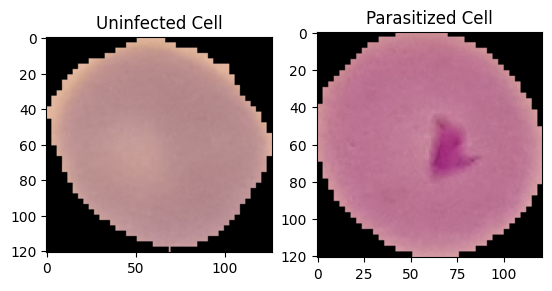

In [10]:
# testing some images
uninfected_cell = "cell_images/testing-samples/C1_thinF_IMG_20150604_104919_cell_82.png"
infected_cell = "cell_images/testing-samples/C38P3thinF_original_IMG_20150621_112116_cell_204.png"

_, ax = plt.subplots(1, 2)
ax[0].imshow(plt.imread(uninfected_cell))
ax[0].title.set_text("Uninfected Cell")
ax[1].imshow(plt.imread(infected_cell))
ax[1].title.set_text("Parasitized Cell")
plt.show()